<a href="https://colab.research.google.com/github/gringotts0324/Psychology_data_analysis/blob/main/2021_Faces_ERP_BEHAV_INDV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:124: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


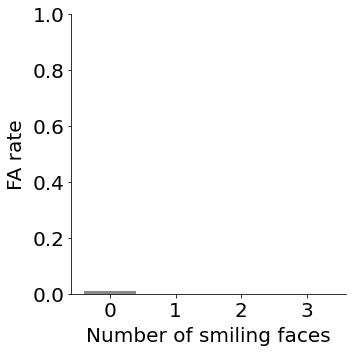


Hit rate


,Hit
102,1.0



RT (Hit)


,RT
102,396.32



False alarm rate


,0,1,2,3
102,0.01,0.0,0.0,0.0


'\ndf_hit_ACCresult.to_csv("Hit_result.csv")\ndf_fa_ACCresult.to_csv("FA_result.csv")\ndf_RTresult.to_csv("RT_result.csv")\n'

In [23]:
####Behavior####

###goals
#1. input: csv file name
#2. main output: table and graph of acuracy and reaction time (for each participant) 
#3. sub output: 

###reference (matplot lib)
###https://note-tech.com/show-multi-graph/
###https://biotech-lab.org/articles/2032 (matplot lib multiple graphs)


###import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

###setting variables
#csv_name = input("csv file name?") + ".csv"
csv_name = "s102_kei.csv"
list_name = "faces"
conditions = [0, 1, 2, 3]

###setting variables of data frame (E-prime general)
sub = "Subject"
RESP = list_name + ".RESP"
ACC = ""
RT = list_name + ".RT"
CRESP = list_name + ".CRESP"


###setting variables of graph
fontsize = 20
bar_color = "#888"
a_x = 0.15
a_y = 1.05

###data
df = pd.read_csv(csv_name)


###preprocessing 
  ## numpy.where(condition, x, y*) ... if the condition is fullfilled, replace elements with x, if not, with y (*optional)
df[RESP] = np.where(df[RESP] == 3, 3, 0)
df["correct_res"] = np.where(df["faces"] == "No", 3, 0)
df["ACC"] = np.where(df["correct_res"] == df[RESP], 1, 0)


##the number of subjects
subjects = df[sub].unique()


##empty DataFrame (hit, false alarm, response time)
df_hit_acc = pd.DataFrame(
    index = [],
    columns = []
)

df_fa_acc = pd.DataFrame(
    index = [],
    columns = [conditions]
)

df_rt = pd.DataFrame(
    index = [],
    columns = []
)

##loop
for subject in subjects:
  df_indv = df[df[sub] == subject]

  hit_acc_list = []
  fa_rate_list = []
  rt_list = []

  df_target = df_indv[df_indv["faces"] == "No"]
  hit_acc = df_target["ACC"].mean()  

  df_correct = df_target[df_target["ACC"] == 1]
  rt_hit_raw = df_correct[RT].mean()
  rt_hit = np.around(rt_hit_raw, decimals = 2)

  ##append list
  hit_acc_list.append(hit_acc)
  rt_list.append(rt_hit)

  for condition in conditions:
    df_cond = df_indv[df_indv["smile"] == condition]

    df_nontarget = df_cond[df_cond["faces"] == "Yes"]
    fa = df_nontarget["ACC"].mean()
    fa_rate = np.around(1 - fa, decimals = 2) 
    ##append list
    fa_rate_list.append(fa_rate)


  ind_hit_acc = pd.Series(hit_acc_list, index = ["Hit"], name = subject)
  df_hit_ACCresult = df_hit_acc.append(ind_hit_acc)

  ind_fa_acc = pd.Series(fa_rate_list, index = [conditions], name = subject)
  df_fa_ACCresult = df_fa_acc.append(ind_fa_acc)

  ind_rt = pd.Series(rt_list, index = ["RT"], name = subject)
  df_RTresult = df_rt.append(ind_rt)
  

  ##graph
  left = [1, 2, 3, 4]
  fig = plt.figure(figsize=[5, 5])
  ax2 = fig.add_subplot(1, 1, 1)

  """
  ax1.bar(left, hit_acc_list, color = bar_color)
  ax1.set_ylim(0,1)

  ax1.set_xlabel("Number of smiling faces", size = fontsize, labelpad = 6)
  ax1.set_xticks([1, 2, 3, 4])
  ax1.set_xticklabels([0, 1, 2, 3], fontsize = fontsize)
  ax1.set_ylabel("Accuracy", size = fontsize, labelpad = 6)
  ax1.set_yticklabels([0.0, 0.2, 0.4, 0.6, 0.8, 1.0], fontsize = fontsize)
  """
  #####
  ax2 = fig.add_subplot(1, 1, 1)
  ax2.bar(left, fa_rate_list, color = bar_color)
  ax2.set_ylim(0,1)

  ax2.set_xlabel("Number of smiling faces", size = fontsize, labelpad = 6)
  ax2.set_xticks([1, 2, 3, 4])
  ax2.set_xticklabels([0, 1, 2, 3], fontsize = fontsize)
  ax2.set_xticks([1, 2, 3, 4])
  ax2.set_ylabel("FA rate", size = fontsize, labelpad = 6)
  ax2.set_yticklabels([0.0, 0.2, 0.4, 0.6, 0.8, 1.0], fontsize = fontsize)
  """
  #####
  ax3 = fig.add_subplot(1, 3, 3)
  ax3.bar(left, rt_list, color = bar_color)
  ax3.set_ylim(0,800)

  ax3.set_xlabel("Number of smiling faces", size = fontsize, labelpad = 6)
  ax3.set_xticks([1, 2, 3, 4])
  ax3.set_xticklabels([0, 1, 2, 3], fontsize = fontsize)
  ax3.set_ylabel("Response time (ms)", size = fontsize, labelpad = 6)
  ax3.set_yticklabels([0, 100, 200, 300, 400, 500, 600, 700, 800], fontsize = fontsize)
  """
  #枠線消し
  axes = [ax2]

  for i in axes:
    i.spines["right"].set_visible(False)
    i.spines["top"].set_visible(False)

  ##グラフ（ax）タイトル
  #ax1.set_title("Hit rate", x= a_x, y=a_y, fontsize = fontsize+3)
  #ax2.set_title("False Alarm rate", x= a_x, y=a_y, fontsize = fontsize+3)
  #ax3.set_title("RT (Hit)", x= a_x, y=a_y, fontsize = fontsize+3)

  ###show
  plt.tight_layout()
  plt.show()
  #plt.savefig("Behavior.png", format ="png", dpi = 600, bbox_inches = "tight")



###table
print()
print("Hit rate")
display(df_hit_ACCresult)
print()
print("RT (Hit)")
display(df_RTresult)
print()
print("False alarm rate")
display(df_fa_ACCresult)

###export csv 
#df.to_csv("data.csv")
"""
df_hit_ACCresult.to_csv("Hit_result.csv")
df_fa_ACCresult.to_csv("FA_result.csv")
df_RTresult.to_csv("RT_result.csv")
"""